# **Importing Basic Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# **Importing Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pwd

/content


In [5]:
!ls

drive  sample_data


In [6]:
!ls drive/MyDrive/dataset/FlipkartReviewDataset.csv

drive/MyDrive/dataset/FlipkartReviewDataset.csv


In [7]:
# Read the CSV file again, skipping malformed rows
df = pd.read_csv('/content/drive/MyDrive/dataset/FlipkartReviewDataset.csv')

# Print the DataFrame
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


# **DATA PERPROCESSING**

Indexing & selecting

In [8]:
# view first five rows of dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [10]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [11]:
df.loc[1:,['review']]

,review
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [12]:
df.loc[1:,['sentiment']]

,sentiment
1,positive
2,positive
3,negative
4,positive
5,positive
...,...
49995,positive
49996,negative
49997,negative
49998,negative


Attributes of Data

In [13]:
# In case of deep copy, a copy(deep = true) copied in the other object with no reference on the original i.e, any changes made to a copy of
# object will not be reflected in the original object
df_1 = df.copy(deep= True)

In [14]:
# To get the index(row label) of the dataframes
df_1.index

RangeIndex(start=0, stop=50000, step=1)

In [15]:
#To get column labels of the dataframes
df_1.columns

Index(['review', 'sentiment'], dtype='object')

In [16]:
df_1.shape

(50000, 2)

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [18]:
df_1.describe()

,review,sentiment
count,50000,50000
unique,49718,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [19]:
df_1.dtypes

,0
review,object
sentiment,object


# **Data Cleaning**

In [20]:
# finding missing values

missing_values = df_1.isnull().sum()
print(missing_values)

review       0
sentiment    0
dtype: int64


In [21]:
# lower casting the data
lower_case = df_1['review'].str.lower()
lower_case

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
49995,i thought this movie did a down right good job...
49996,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...
49998,i'm going to have to disagree with the previou...


Removing Punctuation

In [22]:
# Removing the punctuation
import string as st
remove_punctuation = st.punctuation
print(remove_punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
# removing puntuation using translate()

df_1['review'] = df_1['review'].str.translate(str.maketrans('', '', remove_punctuation))
df_1['review']

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production br br The filmin...
2,I thought this was a wonderful way to spend ti...
3,Basically theres a family where a little boy J...
4,Petter Matteis Love in the Time of Money is a ...
...,...
49995,I thought this movie did a down right good job...
49996,Bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...
49998,Im going to have to disagree with the previous...


In [24]:
# Remove comma from a String

df_1['review'] = df_1['review'].str.replace(',', '')
df_1['review']

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production br br The filmin...
2,I thought this was a wonderful way to spend ti...
3,Basically theres a family where a little boy J...
4,Petter Matteis Love in the Time of Money is a ...
...,...
49995,I thought this movie did a down right good job...
49996,Bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...
49998,Im going to have to disagree with the previous...


In [25]:
df_1

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


Stop Words Cleaning

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.tokenize import word_tokenize
tokenized_words = word_tokenize(df_1['review'][0])
print(tokenized_words)

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'youll', 'be', 'hooked', 'They', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'mebr', 'br', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', 'Trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'Its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'wordI', 'would', 'say', 'the', 'main', 'appeal', 'of', 'the', 'show', 'is', 'due', 'to', 'the', 'fact', 'that', 'it', 'goes', 'where', 'other', 'shows', 'wouldnt', 'dare', 'Forget', 'pretty', 'pictures', 'painted', 'for', 'mainstream', 'audiences', 'forget', 'charm', 'forget', 'romance

In [28]:
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()


stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_1["sentiment"] = df_1["sentiment"].apply(clean)

# **Model Building**

###LSTM MODEL


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
# Convert sentiment labels to numerical values (0 and 1)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Splitting the data
X = df['review'].values
y = df['sentiment'].values
# Tokenizing and padding the sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [41]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
epochs = 5
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.7097 - loss: 0.5315 - val_accuracy: 0.8410 - val_loss: 0.3463
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8841 - loss: 0.2898 - val_accuracy: 0.8631 - val_loss: 0.3208
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9188 - loss: 0.2129 - val_accuracy: 0.8580 - val_loss: 0.3412
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9434 - loss: 0.1546 - val_accuracy: 0.8494 - val_loss: 0.4080
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9638 - loss: 0.1055 - val_accuracy: 0.8497 - val_loss: 0.5315


In [43]:
# Evaluate on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test Accuracy: 84.85%


### TextBlob Model

In [63]:
! pip install textblob

In [64]:
import pandas as pd
from textblob import TextBlob


In [65]:
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # TextBlob returns a polarity score between -1 (negative) and 1 (positive)
    return analysis.sentiment.polarity

# Apply the function to the review column
df['polarity'] = df['review'].apply(get_sentiment)

# Define a function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply classification
df['sentiment'] = df['polarity'].apply(classify_sentiment)

# Display the results
df[['review', 'polarity', 'sentiment']].head()


,review,polarity,sentiment
0,One of the other reviewers has mentioned that ...,0.033590,positive
1,A wonderful little production. <br /><br />The...,0.109722,positive
2,I thought this was a wonderful way to spend ti...,0.354008,positive
3,Basically there's a family where a little boy ...,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.217952,positive


sentiment
positive    37938
negative    12031
neutral        31
Name: count, dtype: int64


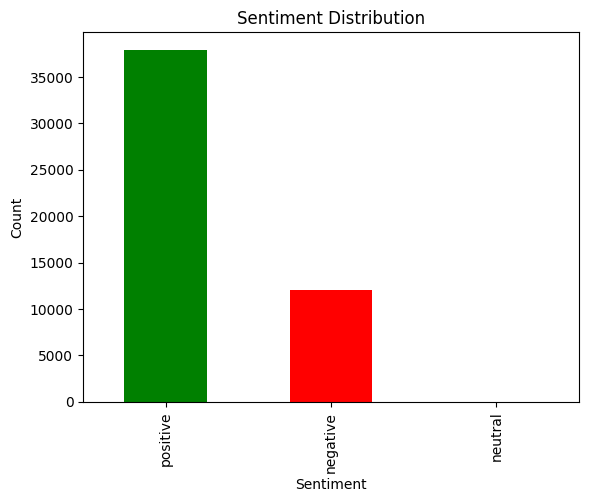

In [66]:
# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Visualize the sentiment distribution (if needed)
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### Comparision of LSTM and TextBlob Model

In [72]:
# Create a new DataFrame for the LSTM predictions
df_lstm = pd.DataFrame({'lstm_sentiment': y_pred.flatten()})

# Apply classify_sentiment to the lstm_sentiment column
df_lstm['lstm_sentiment'] = df_lstm['lstm_sentiment'].apply(classify_sentiment)
# Count the number of each sentiment for both models
textblob_counts = df['textblob_sentiment'].value_counts()
lstm_counts = df['lstm_sentiment'].value_counts()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Sentiment': textblob_counts.index,
    'TextBlob': textblob_counts.values,
    'LSTM': lstm_counts.reindex(textblob_counts.index, fill_value=0).values
})

# Melt the DataFrame for easier plotting
comparison_df = comparison_df.melt(id_vars='Sentiment', var_name='Model', value_name='Count')

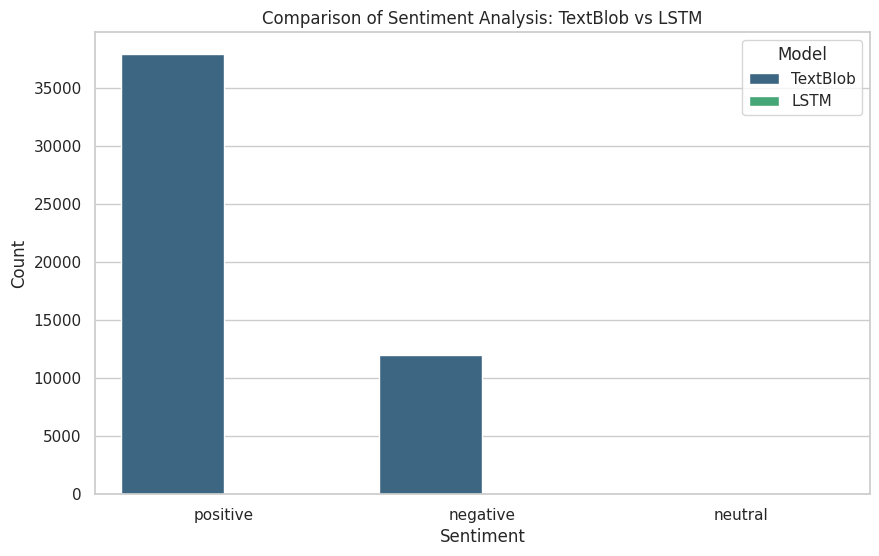

In [73]:
import seaborn as sns
# Set up the plotting style
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Sentiment', y='Count', hue='Model', palette='viridis')

# Add title and labels
plt.title('Comparison of Sentiment Analysis: TextBlob vs LSTM')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Model')
plt.show()
